<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/labs/JPMC_Day5_Team6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Feature Importance
#Dataframe and numerical library
import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learming Model
from sklearn.linear_model import LogisticRegression 

In [ ]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml 
# Download the dataset from openml
dataset = fetch_openml(data_id=43696, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
pd.set_option("display.max_columns", None)
df.sample(5)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1012,31,Yes,Travel_Frequently,667,Sales,1,4,Life Sciences,1,1427,2,Female,50,1,1,Sales Representative,3,Single,1359,16154,1,Y,No,12,3,2,80,0,1,3,3,1,0,0,0
1217,24,No,Travel_Rarely,581,Research Development,9,3,Medical,1,1707,3,Male,62,4,1,Research Scientist,3,Married,4401,17616,1,Y,No,16,3,4,80,1,5,1,3,5,3,0,4
69,36,Yes,Travel_Rarely,318,Research Development,9,3,Medical,1,90,4,Male,79,2,1,Research Scientist,3,Married,3388,21777,0,Y,Yes,17,3,1,80,1,2,0,2,1,0,0,0
1161,38,No,Travel_Rarely,397,Research Development,2,2,Medical,1,1638,4,Female,54,2,3,Manufacturing Director,3,Married,7756,14199,3,Y,Yes,19,3,4,80,1,10,6,4,5,4,0,2
1203,53,No,Travel_Rarely,1395,Research Development,24,4,Medical,1,1689,2,Male,48,4,3,Healthcare Representative,4,Married,7005,3458,3,Y,No,15,3,3,80,0,11,2,3,4,3,1,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df = df.fillna(0)  # Use with caution.  you eliminate the big holes and then small holes in your data before doing this
print(df.isnull().sum())
print(df.dtypes)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

- Standard Scaler: good when data is normalized BUT the features have different scales (works well with Log Reg, Lin Reg, SVM)
- Min-Max Scaler: resize them to a value between 0 and 1. When the data is NOT normalized and the features have diff scales.  Works well with larger models... NN... image processing
- Robust Scaler: good when the data has a lot of outliers or when there is NOT a normalized dataset. Good SVM, KNN
- Max Abs Scaler: goes from -1 to 1.  Good when there are positive and neg values in your dataset. Usually only used with NN.
- Power Transformer: good when the data is not normalized OR highly skeweed.  Good with most of the lin models and NN.

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)

In [ ]:
numDF.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
catDF.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research Development,Medical,Male,Laboratory Technician,Married,Y,No


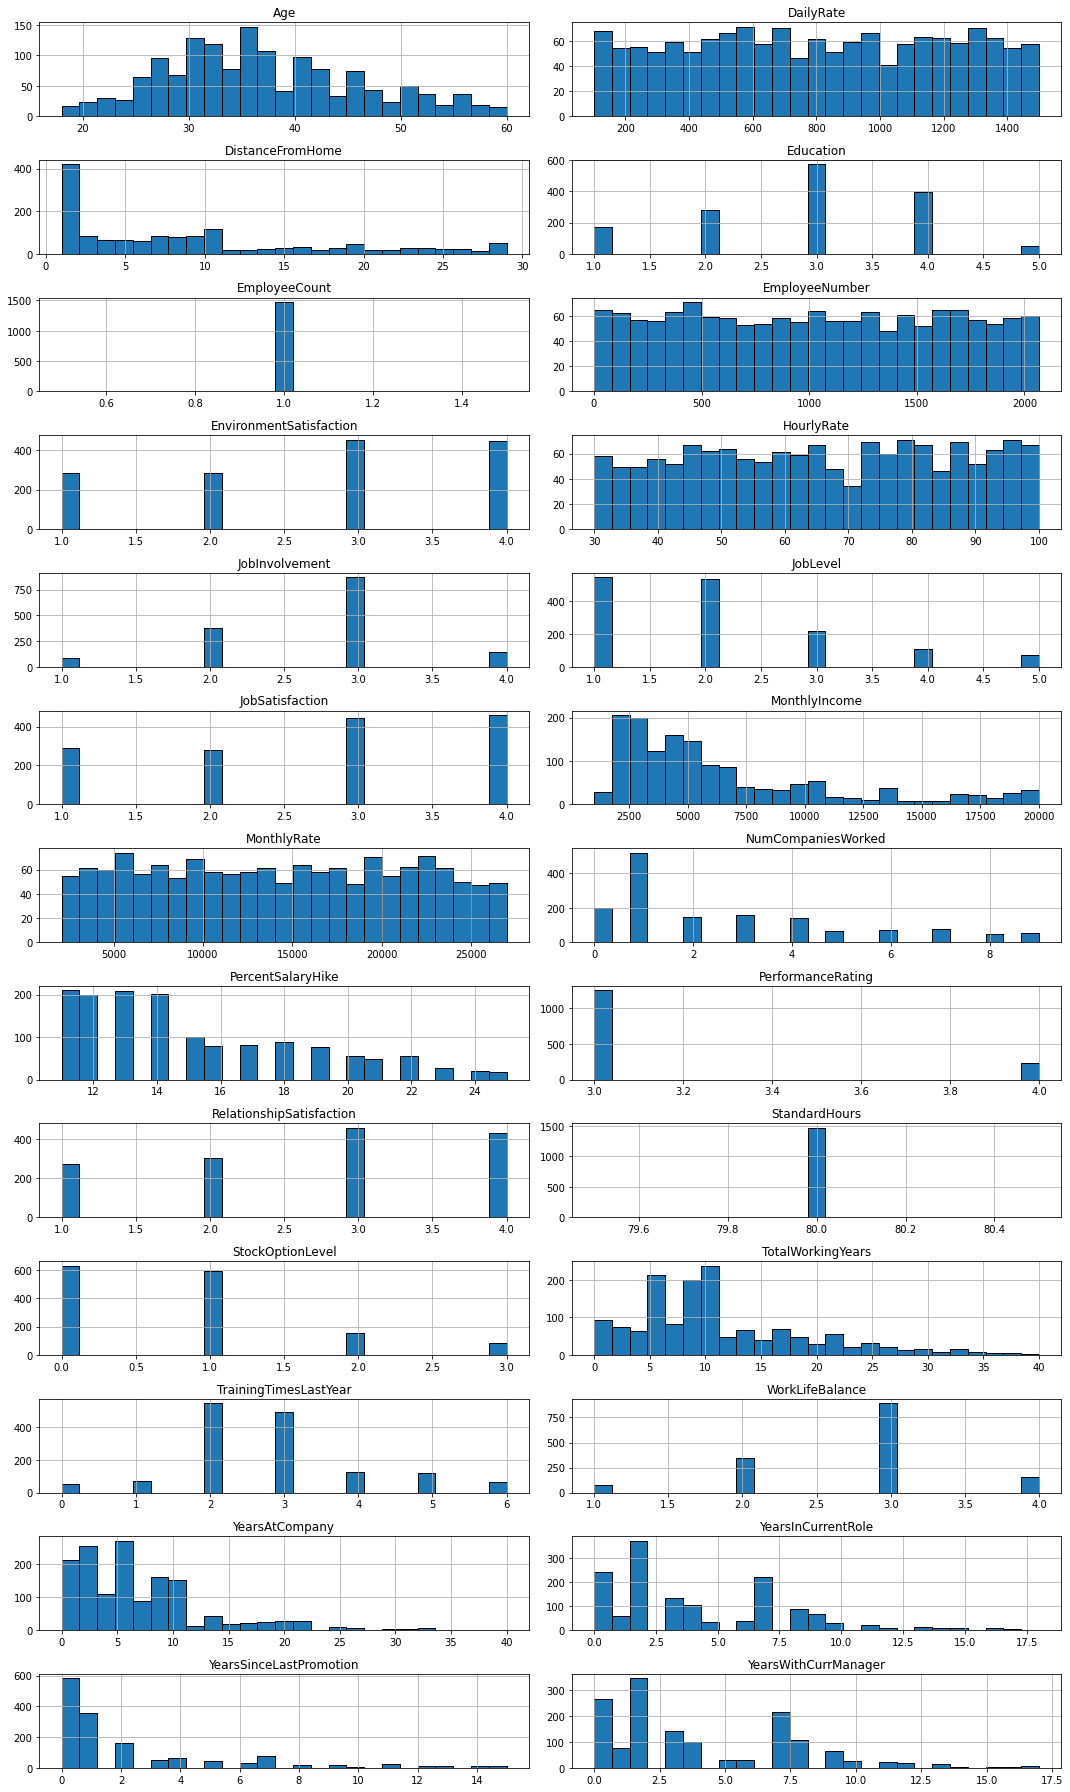

In [ ]:
# Plots the histogram for each numerical feature in a separate subplot
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2),
edgecolor="black")
plt.tight_layout();

In [ ]:
# Scale all numeric columns
numDF = pd.DataFrame(robust_scaler.fit_transform(numDF.values),columns=numDF.columns,index=numDF.index)
numDF.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.384615,0.433526,-0.500000,-0.5,0.0,-0.957727,-0.5,0.783217,0.0,0.0,0.5,0.196416,0.422369,2.000000,-0.500000,0.0,-1.0,0.0,-1.0,-0.222222,-3.0,-2.0,0.166667,0.2,-0.333333,0.4
1,1.000000,-0.755780,0.083333,-1.0,0.0,-0.956787,0.0,-0.139860,-1.0,0.0,-0.5,0.038588,0.859600,-0.333333,1.500000,1.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.833333,0.8,0.000000,0.8
2,0.076923,0.825145,-0.416667,-0.5,0.0,-0.954908,0.5,0.727273,-1.0,-0.5,0.0,-0.517374,-0.953683,1.333333,0.166667,0.0,-0.5,0.0,-1.0,-0.333333,0.0,0.0,-0.833333,-0.6,-0.333333,-0.6
3,-0.230769,0.852601,-0.333333,0.5,0.0,-0.953969,0.5,-0.279720,0.0,-0.5,0.0,-0.367593,0.718797,-0.333333,-0.500000,0.0,0.0,0.0,-1.0,-0.222222,0.0,0.0,0.500000,0.8,0.666667,-0.6
4,-0.692308,-0.304913,-0.416667,-1.0,0.0,-0.952090,-1.0,-0.727273,0.0,-0.5,-0.5,-0.265362,0.193040,2.333333,-0.333333,0.0,0.5,0.0,0.0,-0.444444,0.0,0.0,-0.500000,-0.2,0.333333,-0.2


- Label Encoding: Ordinal relationship... like low, medium, and high.
- One Hot Encoding: create a new binary column for each sub-cat in a feature/col.  Creates a HUGE sparse matrix. 
- Dummy Encoding: multiple cat and the cat are NOT ordinal.  Order does NOT matter.
- Hash Encoding: good when there is HIGH cardinality of a cat variable. In other words, when there are a large number of unique values
- Count Encoding: replace the cat with their frequency counts. Good for high cardinality.

In [ ]:
# Drop the target variable from the DF
catDF.drop(['Attrition'],axis=1,inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
catDF.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
# Encode your cat data
catDF = pd.get_dummies(catDF,drop_first=True)

In [ ]:
catDF.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Merge with the original dataframe
# Prepare the X variables
X = pd.concat([catDF, numDF],axis=1)
print(X.shape)
#Prepare the Y variable
Y = df['Attrition']

(1470, 47)


In [ ]:
# Feature Importance

In [ ]:
# Tree models have trouble turning strings to float to labelel the target
Y = Y.replace(to_replace=['No','Yes'],value=[0,1])
print(Y.shape)
Y.head()

(1470,)


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

A = X
B = Y 

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(A, B)

importances = rf.feature_importances_
importances
# Print the feature importances with the corresponding column names
for feature, importance in zip(df.columns, importances):
    print(f"{feature}: {importance}")

Age: 0.013935055086522253
Attrition: 0.007388747187269769
BusinessTravel: 0.007835717440592341
DailyRate: 0.00928462864041435
Department: 0.0061093996478489895
DistanceFromHome: 0.006613734077892059
Education: 0.007770857916533316
EducationField: 0.0030231194703222554
EmployeeCount: 0.006841997630987107
EmployeeNumber: 0.00906295975747806
EnvironmentSatisfaction: 0.0034922507018654934
Gender: 0.009307145341163586
HourlyRate: 0.0012840584655568216
JobInvolvement: 0.0029584928739534388
JobLevel: 0.0008336036348981958
JobRole: 0.00820633935089073
JobSatisfaction: 0.005527828985967043
MaritalStatus: 0.006713602365988022
MonthlyIncome: 0.007589604024176796
MonthlyRate: 0.016807825014806033
NumCompaniesWorked: 0.0502201378052074
Over18: 0.05710892783766753
OverTime: 0.05116983197945053
PercentSalaryHike: 0.04048950236330677
PerformanceRating: 0.02108751536152933
RelationshipSatisfaction: 0.0
StandardHours: 0.046716686848301284
StockOptionLevel: 0.029694456762681485
TotalWorkingYears: 0.04313

We noticed that a lot of data is irrelevant, therefore we could drop those columns such as RelationshipSatisfaction, JobLevel etc

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)

In [ ]:
# First we build and train our Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.feature_importances_
# create a new DataFrame with feature importances and column names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the feature importances
print(feature_importances)

                             feature  importance
20                      OverTime_Yes    0.110448
32                     MonthlyIncome    0.102815
40                 TotalWorkingYears    0.056885
21                               Age    0.052681
43                    YearsAtCompany    0.049812
22                         DailyRate    0.045506
23                  DistanceFromHome    0.043560
33                       MonthlyRate    0.033895
28                        HourlyRate    0.030192
26                    EmployeeNumber    0.030146
31                   JobSatisfaction    0.028763
46              YearsWithCurrManager    0.028215
30                          JobLevel    0.027748
29                    JobInvolvement    0.027196
44                YearsInCurrentRole    0.026402
39                  StockOptionLevel    0.025539
34                NumCompaniesWorked    0.024779
27           EnvironmentSatisfaction    0.023239
35                 PercentSalaryHike    0.022453
19              Mari

In [ ]:
# Permutation Importance

from sklearn.inspection import permutation_importance
A,B = X, Y

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(A,B)

result = permutation_importance(rf, A,B, n_repeats=10, random_state=42) 
importances = result.importances_mean
# Print the feature importances with the corresponding column names
for feature, importance in zip(df.columns, importances):
    print(f"{feature}: {importance}")

Age: 0.0034693877551020603
Attrition: 0.0
BusinessTravel: 0.0004761904761905078
DailyRate: 0.00156462585034014
Department: 0.0003401360544217913
DistanceFromHome: 0.0
Education: 0.0
EducationField: 0.0
EmployeeCount: 0.0007482993197279186
EmployeeNumber: 0.0
EnvironmentSatisfaction: 0.0
Gender: 0.0008163265306122769
HourlyRate: 0.0
JobInvolvement: 0.0
JobLevel: 0.0
JobRole: 0.0
JobSatisfaction: 0.00122448979591836
MaritalStatus: 0.0006122448979592243
MonthlyIncome: 0.0
MonthlyRate: 0.0080952380952381
NumCompaniesWorked: 0.04877551020408162
Over18: 0.012857142857142834
OverTime: 0.007278911564625845
PercentSalaryHike: 0.0074829931972788975
PerformanceRating: 0.0001360544217687165
RelationshipSatisfaction: 0.0
StandardHours: 0.005782312925170075
StockOptionLevel: 0.009999999999999976
TotalWorkingYears: 0.0032653061224489854
TrainingTimesLastYear: 0.0041496598639455765
WorkLifeBalance: 0.008911564625850354
YearsAtCompany: 0.004829931972789125
YearsInCurrentRole: 0.017006802721088444
Years

There are a lot of columns with 0 importance such as MonthlyIncome, HourlyRate, JobLevel etc

In [ ]:
# Merge with the original dataframe
# Prepare the X variables
X = pd.concat([catDF, numDF],axis=1)
print(X.shape)
#Prepare the Y variable
Y = df['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean


(1470, 47)


In [ ]:
print(perm.to_string())

                                  AVG_Importance STD_Importance
BusinessTravel_Travel_Frequently       -0.002041            NaN
BusinessTravel_Travel_Rarely            0.000000            NaN
Department_Research  Development        0.000000            NaN
Department_Sales                        0.000454            NaN
EducationField_Life Sciences           -0.001361            NaN
EducationField_Marketing                0.000000            NaN
EducationField_Medical                 -0.000227            NaN
EducationField_Other                    0.002041            NaN
EducationField_Technical Degree        -0.000227            NaN
Gender_Male                            -0.000680            NaN
JobRole_Human Resources                -0.000227            NaN
JobRole_Laboratory Technician           0.002041            NaN
JobRole_Manager                         0.000227            NaN
JobRole_Manufacturing Director          0.000454            NaN
JobRole_Research Director               

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X,Y)

KNeighborsClassifier()

In [ ]:
results = permutation_importance(kn, X_test, y_test, n_repeats=10, random_state=0)

Feature: 0  Score: -0.009297052154195018
Feature: 1  Score: -0.008390022675736974
Feature: 2  Score: -0.007482993197278909
Feature: 3  Score: -0.007029478458049898
Feature: 4  Score: -0.0065759637188208655
Feature: 5  Score: -0.004988662131519284
Feature: 6  Score: -0.004988662131519284
Feature: 7  Score: -0.0049886621315192725
Feature: 8  Score: -0.0047619047619047675
Feature: 9  Score: -0.004081632653061207
Feature: 10  Score: -0.0038548752834467125
Feature: 11  Score: -0.0036281179138322184
Feature: 12  Score: -0.003628117913832207
Feature: 13  Score: -0.003401360544217702
Feature: 14  Score: -0.003401360544217702
Feature: 15  Score: -0.0031746031746031633
Feature: 16  Score: -0.0027210884353741525
Feature: 17  Score: -0.0024943310657596363
Feature: 18  Score: -0.0024943310657596363
Feature: 19  Score: -0.0022675736961451642
Feature: 20  Score: -0.002267573696145153
Feature: 21  Score: -0.002267573696145131
Feature: 22  Score: -0.0018140589569161092
Feature: 23  Score: -0.0015873015

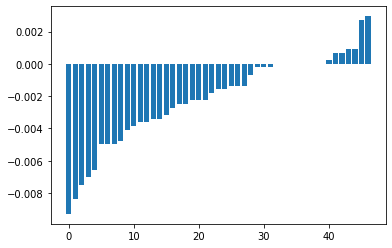

In [ ]:
from matplotlib import pyplot

# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

Feature 0: MaritalStatus_Single - Score: 0.002947845804988658
Feature 1: WorkLifeBalance - Score: 0.0027210884353741525
Feature 2: YearsSinceLastPromotion - Score: 0.0009070294784580546
Feature 3: TotalWorkingYears - Score: 0.0009070294784580435
Feature 4: YearsInCurrentRole - Score: 0.0006802721088435493
Feature 5: PerformanceRating - Score: 0.0006802721088435381
Feature 6: StockOptionLevel - Score: 0.00022675736961450533
Feature 7: OverTime_Yes - Score: 2.2204460492503132e-17
Feature 8: EducationField_Medical - Score: 0.0
Feature 9: EducationField_Medical - Score: 0.0
Feature 10: EducationField_Medical - Score: 0.0
Feature 11: EducationField_Medical - Score: 0.0
Feature 12: EducationField_Medical - Score: 0.0
Feature 13: EducationField_Medical - Score: 0.0
Feature 14: EducationField_Medical - Score: 0.0
Feature 15: YearsWithCurrManager - Score: -0.00022675736961450533
Feature 16: EducationField_Marketing - Score: -0.0002267573696145164
Feature 17: EducationField_Marketing - Score: -0

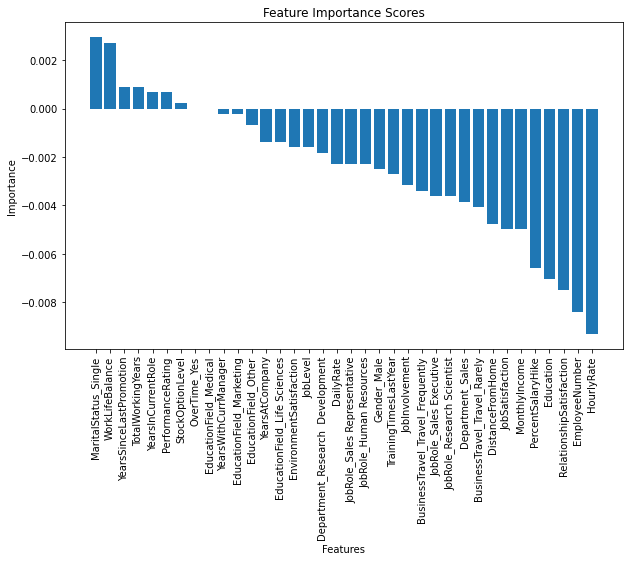

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
importance = results.importances_mean

# Get column headers
columns = X.columns

# Sort the importance scores in ascending order
importance_sorted = np.sort(importance)

# Reverse the order of the scores to plot them in descending order
importance_sorted = importance_sorted[::-1]

# Get the corresponding column headers for the sorted importance scores
columns_sorted = [columns[np.where(importance == score)[0][0]] for score in importance_sorted]

# Summarize feature importance
for i, (col, score) in enumerate(zip(columns_sorted, importance_sorted)):
    print('Feature {}: {} - Score: {}'.format(i, col, score))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(columns_sorted, importance_sorted)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.show()


In [ ]:
# Analyze the Coefficients:

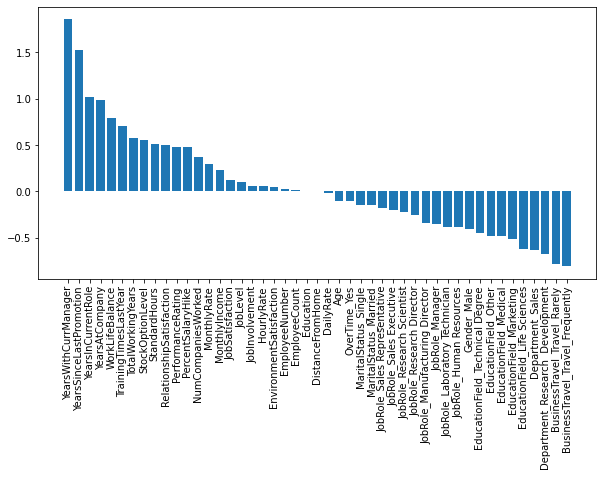

In [ ]:
# Coefficients
model = LogisticRegression()
model.fit(X,Y)
importance = model.coef_[0]
importance = np.sort(importance)
importance
importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance = importance.sort_values('importance', ascending=False)

# create a chart of feature importances
plt.figure(figsize=(10,5))
plt.bar(importance['feature'], importance['importance'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
Y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

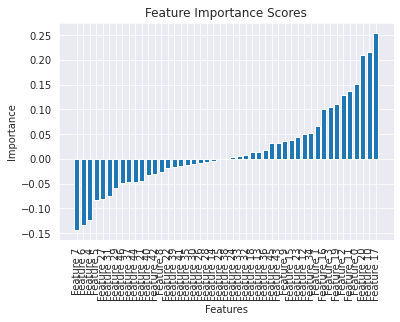

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a regression dataset with 10 features and 5 informative features
X, y = X, Y.replace(to_replace=['No','Yes'],value=[0,1])


# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Get the feature importances (i.e., coefficients) from the model
importance = model.coef_

# Sort the importance scores in ascending order
importance_sorted = np.sort(importance)

# Get the corresponding column names for the sorted importance scores
columns_sorted = [f'Feature {i}' for i in np.argsort(importance)]

# Plot the feature importances in ascending order
sns.set_style("darkgrid")
plt.bar(columns_sorted, importance_sorted)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.show()


In [ ]:
len(df.columns)

35

In [ ]:
# Import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

# Split the dataset into X (features) and y (target)
X = X
y = y

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination with cross-validation
rfe = RFE(model, n_features_to_select=46, verbose=2)
X_rfe = rfe.fit_transform(X, y)

# Get the feature ranking and scores for selected features
feature_ranking = rfe.ranking_
feature_scores = rfe.estimator_.coef_
selected_features = np.where(rfe.support_)[0]

# Print the feature ranking and scores for selected features
# for i in selected_features:
#     print(f'Feature {i+1}: {df.columns[i]} - Ranking: {feature_ranking[i]} - Score: {feature_scores[i]}')

# # Print the selected features
# print('Selected features:', [df.columns[i] for i in selected_features])


Fitting estimator with 47 features.


In [ ]:
feature_ranking

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
feature_scores

array([ 1.52335632e-01,  6.56112846e-02,  1.29337969e-01,  1.05257082e-01,
       -1.22458652e-01, -8.20925937e-02, -1.34414599e-01, -1.44255217e-01,
       -2.67402252e-02,  3.52661040e-02,  2.16278702e-01,  1.36870304e-01,
        5.06092804e-02,  1.46572941e-02, -3.38200284e-03,  3.85753298e-02,
        1.01719408e-01,  2.55282348e-01,  1.32294747e-02,  1.10172611e-01,
        2.10510877e-01, -4.55484102e-02, -1.86719282e-02,  4.34870724e-02,
        3.81714537e-03, -8.04010016e-03, -8.07967697e-02, -6.03582368e-03,
       -5.79997413e-02, -1.08327493e-02, -7.46914581e-02,  7.98139801e-03,
        5.83089766e-03,  5.16148297e-02, -1.30884306e-02,  1.82601903e-02,
       -4.66064855e-02, -1.76941795e-16, -1.65388524e-02, -3.34365316e-02,
       -1.34075571e-02, -3.13742570e-02,  3.29935167e-02, -4.60903774e-02,
        3.24260905e-02, -4.78243807e-02])

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.


ValueError: ignored

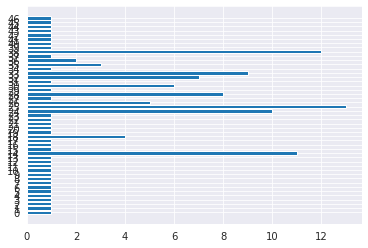

In [ ]:
# Import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset

# Split the dataset into X (features) and y (target)
X = X
y = y

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination with cross-validation
rfe = RFE(model, n_features_to_select=35, verbose=1)
X_rfe = rfe.fit_transform(X, y)

# Get the feature ranking and scores
feature_ranking = rfe.ranking_
feature_scores = rfe.estimator_.coef_

# Create a horizontal bar plot of the feature rankings
fig, ax = plt.subplots()
ax.barh(range(len(feature_ranking)), feature_ranking)
ax.set_yticks(range(len(feature_ranking)))
ax.set_yticklabels(df.columns)
ax.invert_yaxis()
ax.set_xlabel('Ranking')
ax.set_title('Feature Rankings')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('feature_rankings.png')
